[ 데이터 분석과 시각화 - 남한과 북한의 발전전력량 분석 ]
- 데이터셋 :  남북한발전전력량.xlsx
- 목적 : 남한의 발전량 변화, 북한의 발전량 변화 분석, 남북한 비교 분석
- 피쳐/속성 : 각 국가별 합계 발전량.
- 탐색 방법 : 데이터셋이 주어졌으므로, 주어진 데이터를 바탕으로 탐색적 분석(EDA)

[진행]
5단계 중 데이터 수집까지의 2단계가 주어짐.
1. 데이터 전처리
2. 시각화 및 탐색
3. 데이터 모델링.

[1] 모듈 로딩 및 데이터 준비 <hr>

In [422]:
## [1-1] 모듈 로딩 
import pandas as pd                     # 데이터 분석 및 전처리용 모듈
import numpy as np                      # 배열(array)을 지원하는 파이썬 패키지

import matplotlib.pyplot as plt         # 데이터 시각화 즉, 그래프 관련 모듈 
import utils                            # 데이터 처리 관련 사용자 정의 모듈

In [423]:
## [1-2] 데이터 준비 
D_FILE = '../DATA/남북한발전전력량.xlsx'

In [424]:
# %pip install openpyxl
## - 첫번째 줄 : 컬러명,  분리자 : , 

koreaDF= pd.read_excel(D_FILE)



[2] 데이터 구조 확인 <hr>

In [425]:
koreaDF.head(5)
koreaDF.tail()

,전력량 (억㎾h),발전 전력별,1990,1991,1992,1993,1994,1995,1996,1997,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
4,NaN,신재생,-,-,-,-,-,-,-,-,...,-,-,-,-,-,86,118,151,173,195
5,북한,합계,277,263,247,221,231,230,213,193,...,236,255,235,237,211,215,221,216,190,239
6,NaN,수력,156,150,142,133,138,142,125,107,...,133,141,125,134,132,135,139,130,100,128
7,NaN,화력,121,113,105,88,93,88,88,86,...,103,114,110,103,79,80,82,86,90,111
8,NaN,원자력,-,-,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,-


In [426]:
koreaDF.info()
# 숫자로 이루어진 데이터지만, 컬럼명에 데이터설명이 들어있어 object로 되어있음
# 인덱스도 마찬가지. 시도별 이름이 겹치지않는다면 인덱스로 사용할 수 있을 것

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 29 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   전력량 (억㎾h)  2 non-null      object
 1   발전 전력별     9 non-null      object
 2   1990       9 non-null      object
 3   1991       9 non-null      object
 4   1992       9 non-null      object
 5   1993       9 non-null      object
 6   1994       9 non-null      object
 7   1995       9 non-null      object
 8   1996       9 non-null      object
 9   1997       9 non-null      object
 10  1998       9 non-null      object
 11  1999       9 non-null      object
 12  2000       9 non-null      object
 13  2001       9 non-null      object
 14  2002       9 non-null      object
 15  2003       9 non-null      object
 16  2004       9 non-null      object
 17  2005       9 non-null      object
 18  2006       9 non-null      object
 19  2007       9 non-null      object
 20  2008       9 non-null      object
 2

In [427]:
utils.printUniqueValue(koreaDF)

# 북한의 경우 원자력 데이터가 없고,
# 남한의 경우에도 신재생 데이터가 없기 때문에 
# 원자력/신재생 행은 데이터 비교 의미가 없다고 생각하여 제외하되
# 남한의 총전력과 원자력은 비교할 필요가 있다고 고려함.


[전력량 (억㎾h)컬럼의 고유값]=====
갯수 :  2
['남한' nan '북한']

[발전 전력별컬럼의 고유값]=====
갯수 :  5
['합계' '수력' '화력' '원자력' '신재생']

[1990컬럼의 고유값]=====
갯수 :  8
[1077 64 484 529 '-' 277 156 121]

[1991컬럼의 고유값]=====
갯수 :  8
[1186 51 573 563 '-' 263 150 113]

[1992컬럼의 고유값]=====
갯수 :  8
[1310 49 696 565 '-' 247 142 105]

[1993컬럼의 고유값]=====
갯수 :  8
[1444 60 803 581 '-' 221 133 88]

[1994컬럼의 고유값]=====
갯수 :  8
[1650 41 1022 587 '-' 231 138 93]

[1995컬럼의 고유값]=====
갯수 :  8
[1847 55 1122 670 '-' 230 142 88]

[1996컬럼의 고유값]=====
갯수 :  8
[2055 52 1264 739 '-' 213 125 88]

[1997컬럼의 고유값]=====
갯수 :  8
[2244 54 1420 771 '-' 193 107 86]

[1998컬럼의 고유값]=====
갯수 :  8
[2153 61 1195 897 '-' 170 102 68]

[1999컬럼의 고유값]=====
갯수 :  8
[2393 61 1302 1031 '-' 186 103 83]

[2000컬럼의 고유값]=====
갯수 :  8
[2664 56 1518 1090 '-' 194 102 92]

[2001컬럼의 고유값]=====
갯수 :  8
[2852 42 1689 1121 '-' 202 106 96]

[2002컬럼의 고유값]=====
갯수 :  8
[3065 53 1821 1191 '-' 190 106 84]

[2003컬럼의 고유값]=====
갯수 :  8
[3225 69 1859 1297 '-' 196 117 79]

[2004컬럼의 고유값]=====


[전처리 목표]
- 남북한 간 동일분류만 비교
- 결측치가 많은 북한 원자력, 남한 신재생은 제거.
- 수치 타입을 object에서 변경.

In [428]:
## 후에 label에 출력하기 위해 영문명으로 변경 및 컬럼 통합삭제
koreaDF['발전 전력별'] = ['ROK-total', 'ROK-water','ROK-fire','ROK-radi','ROK-new','DPRK-total','DPRK-water','DPRK-fire','DPRK-radi']
koreaDF.drop(columns='전력량 (억㎾h)', inplace=True)
koreaDF.index = koreaDF['발전 전력별']
koreaDF.drop(columns='발전 전력별', inplace=True)
koreaDF

,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
발전 전력별,,,,,,,,,,,,,,,,,,,,,
ROK-total,1077,1186,1310,1444,1650,1847,2055,2244,2153,2393,...,4031,4224,4336,4747,4969,5096,5171,5220,5281,5404
ROK-water,64,51,49,60,41,55,52,54,61,61,...,50,56,56,65,78,77,84,78,58,66
ROK-fire,484,573,696,803,1022,1122,1264,1420,1195,1302,...,2551,2658,2802,3196,3343,3430,3581,3427,3402,3523
ROK-radi,529,563,565,581,587,670,739,771,897,1031,...,1429,1510,1478,1486,1547,1503,1388,1564,1648,1620
ROK-new,-,-,-,-,-,-,-,-,-,-,...,-,-,-,-,-,86,118,151,173,195
DPRK-total,277,263,247,221,231,230,213,193,170,186,...,236,255,235,237,211,215,221,216,190,239
DPRK-water,156,150,142,133,138,142,125,107,102,103,...,133,141,125,134,132,135,139,130,100,128
DPRK-fire,121,113,105,88,93,88,88,86,68,83,...,103,114,110,103,79,80,82,86,90,111
DPRK-radi,-,-,-,-,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,-


In [429]:
## 의미없다고 생각되는 행 삭제.
koreaDF.drop('ROK-new',inplace=True)
koreaDF.drop('DPRK-radi',inplace=True)
koreaDF

,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
발전 전력별,,,,,,,,,,,,,,,,,,,,,
ROK-total,1077,1186,1310,1444,1650,1847,2055,2244,2153,2393,...,4031,4224,4336,4747,4969,5096,5171,5220,5281,5404
ROK-water,64,51,49,60,41,55,52,54,61,61,...,50,56,56,65,78,77,84,78,58,66
ROK-fire,484,573,696,803,1022,1122,1264,1420,1195,1302,...,2551,2658,2802,3196,3343,3430,3581,3427,3402,3523
ROK-radi,529,563,565,581,587,670,739,771,897,1031,...,1429,1510,1478,1486,1547,1503,1388,1564,1648,1620
DPRK-total,277,263,247,221,231,230,213,193,170,186,...,236,255,235,237,211,215,221,216,190,239
DPRK-water,156,150,142,133,138,142,125,107,102,103,...,133,141,125,134,132,135,139,130,100,128
DPRK-fire,121,113,105,88,93,88,88,86,68,83,...,103,114,110,103,79,80,82,86,90,111


In [430]:
# 데이터타입 변경
koreaDF.astype(int)

,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
발전 전력별,,,,,,,,,,,,,,,,,,,,,
ROK-total,1077,1186,1310,1444,1650,1847,2055,2244,2153,2393,...,4031,4224,4336,4747,4969,5096,5171,5220,5281,5404
ROK-water,64,51,49,60,41,55,52,54,61,61,...,50,56,56,65,78,77,84,78,58,66
ROK-fire,484,573,696,803,1022,1122,1264,1420,1195,1302,...,2551,2658,2802,3196,3343,3430,3581,3427,3402,3523
ROK-radi,529,563,565,581,587,670,739,771,897,1031,...,1429,1510,1478,1486,1547,1503,1388,1564,1648,1620
DPRK-total,277,263,247,221,231,230,213,193,170,186,...,236,255,235,237,211,215,221,216,190,239
DPRK-water,156,150,142,133,138,142,125,107,102,103,...,133,141,125,134,132,135,139,130,100,128
DPRK-fire,121,113,105,88,93,88,88,86,68,83,...,103,114,110,103,79,80,82,86,90,111


In [431]:
koreaDF = koreaDF.T
koreaDF

발전 전력별,ROK-total,ROK-water,ROK-fire,ROK-radi,DPRK-total,DPRK-water,DPRK-fire
1990,1077,64,484,529,277,156,121
1991,1186,51,573,563,263,150,113
1992,1310,49,696,565,247,142,105
1993,1444,60,803,581,221,133,88
1994,1650,41,1022,587,231,138,93
1995,1847,55,1122,670,230,142,88
1996,2055,52,1264,739,213,125,88
1997,2244,54,1420,771,193,107,86
1998,2153,61,1195,897,170,102,68
1999,2393,61,1302,1031,186,103,83


[4] 데이터 시각화 <hr>

(27,) (27,) (27,) (27,)


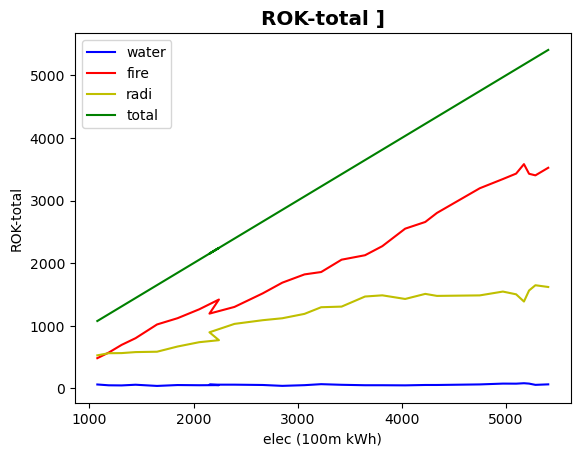

In [432]:
# 남한의 전력분석
xData = koreaDF['ROK-total']
yData1 = koreaDF['ROK-water']
yData2 = koreaDF['ROK-fire']
yData3 = koreaDF['ROK-radi']
yData4 = koreaDF['ROK-total']
print(xData.shape, yData1.shape, yData2.shape, yData3.shape)

plt.plot(xData, yData1, 'b-', label='water')
plt.plot(xData, yData2, 'r-', label='fire')
plt.plot(xData, yData3, 'y-', label='radi')
plt.plot(xData, yData4, 'g-', label='total')
plt.title(f'ROK-total ]' , fontdict={'weight':'bold', 'size':'x-large'})
plt.legend()
plt.ylabel('ROK-total')
plt.xlabel('elec (100m kWh)')
plt.show()


In [444]:
# 상관계수

corrDF=koreaDF.corr()
corrDF['ROK-total']


발전 전력별
ROK-total     1.000000
ROK-water     0.573182
ROK-fire      0.995461
ROK-radi      0.954046
DPRK-total   -0.120491
DPRK-water   -0.108616
DPRK-fire    -0.100843
Name: ROK-total, dtype: float64

남한 발전량 변화 <hr>
전체적으로 증가하는 중, 수력비중은 큰 변화가 없지만, 원자력과 화력발전 의존도는 크게올랐다.

(27,) (27,) (27,) (27,)


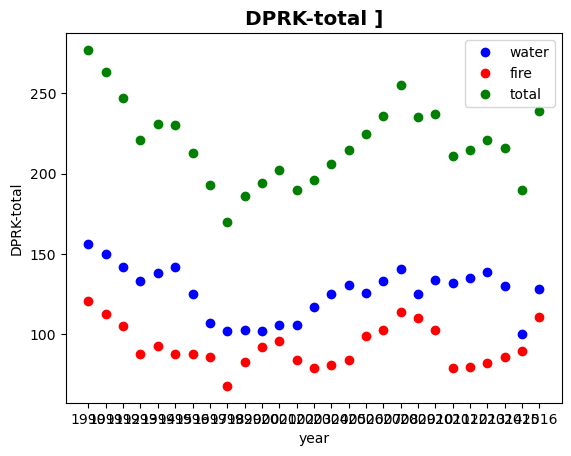

In [448]:
# 북한의 전력분석
xData = koreaDF.index
yData1 = koreaDF['DPRK-water']
yData2 = koreaDF['DPRK-fire']
# yData3 = koreaDF['DPRK-radi']
yData4 = koreaDF['DPRK-total']
print(xData.shape, yData1.shape, yData2.shape, yData3.shape)

plt.plot(xData, yData1, 'bo', label='water')
plt.plot(xData, yData2, 'ro', label='fire')
# plt.plot(xData, yData3, 'yo', label='radi')
plt.plot(xData, yData4, 'go', label='total')
plt.title(f'DPRK-total ]' , fontdict={'weight':'bold', 'size':'x-large'})
plt.legend()
plt.ylabel('DPRK-total')
plt.xlabel('year')
plt.show()


(27,) (27,) (27,) (27,)


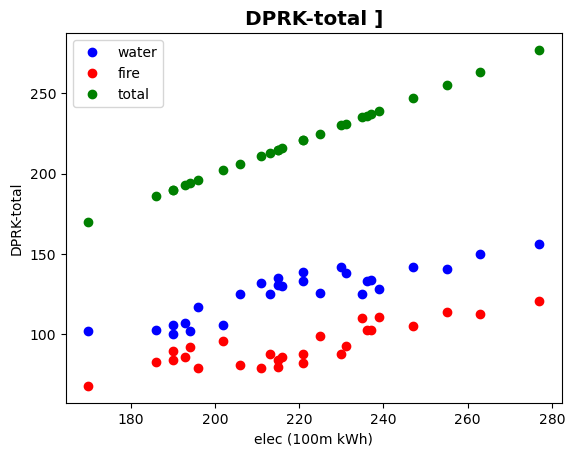

In [450]:
# 북한의 전력분석
xData = koreaDF['DPRK-total']
yData1 = koreaDF['DPRK-water']
yData2 = koreaDF['DPRK-fire']
# yData3 = koreaDF['DPRK-radi']
yData4 = koreaDF['DPRK-total']
print(xData.shape, yData1.shape, yData2.shape, yData3.shape)

plt.plot(xData, yData1, 'bo', label='water')
plt.plot(xData, yData2, 'ro', label='fire')
# plt.plot(xData, yData3, 'yo', label='radi')
plt.plot(xData, yData4, 'go', label='total')
plt.title(f'DPRK-total ]' , fontdict={'weight':'bold', 'size':'x-large'})
plt.legend()
plt.ylabel('DPRK-total')
plt.xlabel('elec (100m kWh)')
plt.show()


In [452]:

corrDF=koreaDF.corr()
corrDF['DPRK-total']

발전 전력별
ROK-total    -0.120491
ROK-water    -0.079644
ROK-fire     -0.094441
ROK-radi     -0.186394
DPRK-total    1.000000
DPRK-water    0.894398
DPRK-fire     0.845357
Name: DPRK-total, dtype: float64

북한 전력 분석 <hr>
크게 증가하지못하고 횡보하고 있으며
수력과 화력의 비중이 수력 약우세로 꾸준히 유지되고 있다.

(27,) (27,)


C:\Users\matdo\AppData\Local\Temp\ipykernel_8944\4095948975.py:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


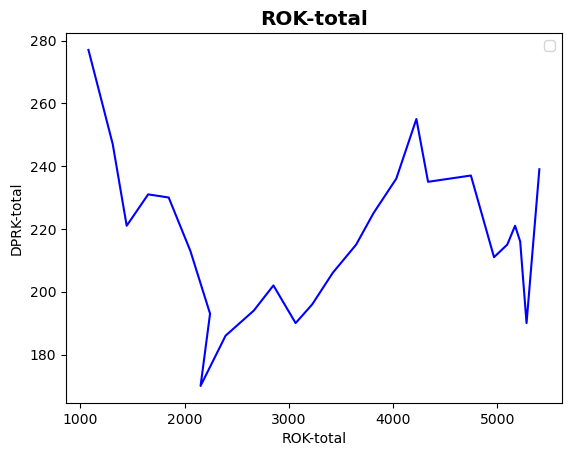

In [457]:
# 남북한의 전력 비교 분석
xData = koreaDF['ROK-total']
yData1 = koreaDF['DPRK-total']

print(xData.shape, yData1.shape)

plt.plot(xData, yData1, 'b-')
plt.title(f'ROK-total' , fontdict={'weight':'bold', 'size':'x-large'})
plt.legend()
plt.ylabel('DPRK-total')
plt.xlabel('ROK-total')
plt.show()

(27,) (27,) (27,)


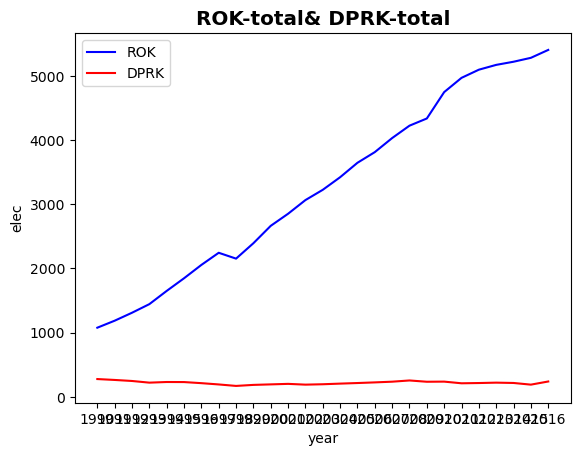

In [456]:
# 남북한의 전력 비교 분석
xData = koreaDF.index
yData1 = koreaDF['ROK-total']
yData2 = koreaDF['DPRK-total']

print(xData.shape, yData1.shape, yData2.shape)

plt.plot(xData, yData1, 'b-', label='ROK')
plt.plot(xData, yData2, 'r-', label='DPRK')
plt.title(f'ROK-total& DPRK-total' , fontdict={'weight':'bold', 'size':'x-large'})
plt.legend()
plt.ylabel('elec')
plt.xlabel('year')
plt.show()

In [459]:
corrDF=koreaDF.corr()
corrDF['DPRK-total']

발전 전력별
ROK-total    -0.120491
ROK-water    -0.079644
ROK-fire     -0.094441
ROK-radi     -0.186394
DPRK-total    1.000000
DPRK-water    0.894398
DPRK-fire     0.845357
Name: DPRK-total, dtype: float64

남북한 전력량 비교분석
- 상관계수가 낮아 연관성은 적어보임
- 시간에 따라 성장하는 남한과 달리 북한쪽은 지속적으로 횡보중임.